<center>
<h1>Employee Attrition for Healthcare</h1>
</center>

### Task 3:

### Employee turnover prediction

Build a predictive model using employee data to anticipate which employees are likely to leave the company. Clean and preprocess the dataset, handling missing values and encoding categorical variables. Select a suitable classification algorithm such as Logistic Regression or Random Forest. Train the model on historical data to learn patterns indicative of employee churn. Evaluate the model's accuracy and effectiveness using metrics like precision and recall to aid in proactive employee retention strategies.

### 1. Let' first download the dataset "jpmiller/employee-attrition-for-healthcare" from Kaggle using the kagglehub package.

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jpmiller/employee-attrition-for-healthcare")

print("Path to dataset files:", path)

/home/student/Desktop/Wonderful/New Test/Healtcare_employee/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/student/.cache/kagglehub/datasets/jpmiller/employee-attrition-for-healthcare/versions/3


### 2. Import necessary Libraries.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix


# About Dataset

This dataset contains employee and company data useful for the analysis. Attrition - whether an employee left or not - is included and can be used as the target variable. The data is synthetic and based on the IBM Watson dataset for attrition. Employee roles and departments were changed to reflect the healthcare domain.

The Dataset is from Employee Attrition for Healthcare. The data has been made available by John Miller under CC0: Public Domain license.


Here are the columns of our dataset

EmployeeID: Unique identifier for each employee 

Age: The age of the employee. 

Attrition: The target variable indicating whether the employee left the company (Yes/No). 

BusinessTravel: Indicates how frequently the employee travels for business (e.g., "Travel_Rarely", "Travel_Frequently", "Non-Travel"). 

DailyRate: The daily rate paid to the employee. 

Department: The department where the employee works (e.g., "Sales", "HR", "Research & Development"). 

DistanceFromHome: The distance (in miles) between the employee's home and workplace.

Education: The highest level of education attained by the employee (e.g., "1", "2", "3", etc.). 

EducationField: The field of education of the employee (e.g., "Life Sciences", "Medical", "Marketing"). 

EmployeeCount: The total number of employees in the company.

EnvironmentSatisfaction: Employee satisfaction with the work environment (scale 1-4). This is likely an important predictor for attrition.

Gender: The gender of the employee (e.g., "Male", "Female").

HourlyRate: Hourly pay rate for the employee.

JobInvolvement: Employee’s involvement in their job (scale 1-4).

JobLevel: The level of the employee’s job (e.g., 1 for entry-level, 2 for mid-level, etc.).

JobRole: The role of the employee (e.g., "Manager", "Technician", "Sales Executive").

JobSatisfaction: Employee satisfaction with their job (scale 1-4). 
MaritalStatus: The marital status of the employee (e.g., "Single", "Married", "Divorced"). 
MonthlyIncome: Monthly income of the employee.
MonthlyRate: The monthly rate paid to the employee.

NumCompaniesWorked: The number of companies the employee has worked for in the past.

Over18: A binary indicator of whether the employee is over 18 years old.
OverTime: Whether the employee worked overtime (Yes/No).

PercentSalaryHike: The percentage increase in salary.
PerformanceRating: Performance rating of the employee (e.g., "1" for low, "2" for high).

RelationshipSatisfaction: Employee satisfaction with relationships at work (scale 1-4). 

StandardHours: The standard number of hours an employee works per week (likely constant for all employees).

Shift: The shift the employee works (e.g., "Day", "Night"). This might be relevant if certain shifts correlate with higher turnover.

TotalWorkingYears: The total number of years the employee has worked in their career. Employees with longer experience might have a different attrition rate compared to newer employees.

TrainingTimesLastYear: The number of times the employee was trained last year. Training opportunities could influence job satisfaction and retention.

WorkLifeBalance: The work-life balance satisfaction (scale 1-4). Poor work-life balance is a known contributor to attrition.

YearsAtCompany: The number of years the employee has been with the company. Employees with shorter tenures might have a higher likelihood of leaving.

YearsInCurrentRole: The number of years the employee has been in their current role. Employees in the same role for longer periods might be less likely to leave.

YearsSinceLastPromotion: The number of years since the employee was last promoted. Employees who haven't been promoted recently might feel stagnant, increasing their likelihood of leaving.

YearsWithCurrManager: The number of years the employee has worked with their current manager. Poor relationships with managers may lead to higher attrition.

### 3. files inside the Kaggle dataset folder

In [4]:

dataset_folder = "/home/student/.cache/kagglehub/datasets/jpmiller/employee-attrition-for-healthcare/versions/3/"
files = os.listdir(dataset_folder)
print(files)


['NSI_National_Health_Care_Retention_Report.pdf', 'watson_healthcare_modified.csv', 'watson_shap_values_for_testset.csv']


The dataset contain these file:
 - NSI_National_Health_Care_Retention_Report.pdf  A report with insights on employee attrition.
 - watson_healthcare_modified.csv :The main dataset for training the model. and 
 - watson_shap_values_for_testset.csv : Likely SHAP values (explainability of model predictions).

The dataset includes a retention report, a modified healthcare employee dataset for training, and SHAP values for model interpretability. The main file for analysis is watson_healthcare_modified.csv. where SHAP (SHapley Additive exPlanations) values help explain how a machine learning model makes predictions by showing the impact of each feature on the model’s output. In this case, watson_shap_values_for_testset.csv likely contains SHAP values that indicate which factors contribute most to employee attrition predictions.

### Load and View the first lines of our dataset


 Let proceed with employee turnover prediction, by checking the contents of watson_healthcare_modified.csv.

In [5]:
dataset_path = "/home/student/.cache/kagglehub/datasets/jpmiller/employee-attrition-for-healthcare/versions/3/watson_healthcare_modified.csv"
healthcare_data = pd.read_csv(dataset_path)

# View the first few rows of the dataset
healthcare_data.head()


,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [6]:
healthcare_data.select_dtypes(include=['object']).columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [7]:
healthcare_data.select_dtypes(include=['number']).columns


Index(['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

### Load testing set

In [8]:
dataset_path = "/home/student/.cache/kagglehub/datasets/jpmiller/employee-attrition-for-healthcare/versions/3/watson_shap_values_for_testset.csv"
healthcare_data_test = pd.read_csv(dataset_path)

# View the first few rows of the dataset
healthcare_data_test.head()


,EmployeeID,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,ShiftSchedule,State,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,10011,-0.082934,-0.049007,0.033110,-0.052101,-0.094783,-0.007782,-0.056123,0,-0.106410,...,0.109181,-0.195666,0.056648,0.011107,-0.017621,-0.000377,-0.032997,0.003732,-0.042552,-0.120689
1,10012,-0.061724,-0.185156,0.004095,-0.055188,-0.063846,-0.032673,-0.057622,0,-0.025947,...,-0.035909,-0.169545,0.043217,0.079458,-0.052512,-0.043295,0.060303,0.016709,-0.037952,0.152560
2,10013,0.006087,-0.057510,0.017782,-0.002091,-0.008152,-0.028928,-0.070993,0,-0.042936,...,-0.038788,-0.169869,0.099417,-0.009016,-0.046488,-0.080971,-0.022697,0.007191,-0.037359,-0.110958
3,10014,-0.012834,0.242323,-0.044950,-0.039829,-0.133996,-0.034905,-0.051805,0,-0.053241,...,-0.024949,0.165522,0.033103,-0.006922,-0.044399,-0.036111,-0.074827,-0.025470,0.004950,-0.036003
4,10015,-0.035391,-0.023601,0.014274,0.015462,-0.138073,0.007920,0.052945,0,-0.072430,...,-0.022945,0.126107,0.101879,-0.028295,-0.055819,-0.049084,-0.013705,0.011744,-0.039383,-0.054550


In [9]:
healthcare_data_test.columns

Index(['EmployeeID', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'ShiftSchedule', 'State', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
healthcare_data.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


Our dataset consists of employee attributes that can be used to predict attrition whether an employee leaves the company or not.

General information about dataset


In [11]:
healthcare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

Our data is a micture of continuous value and categorical calues.


Our dataset contain 166 rows entries and 35 columns. It has 26 Numeric columns with datatype int64 which represent continuous values or categorical values. in addition it has 9 object columns which are categorical variables such as attrition, department, age and Job title means that There are a mix of continuous and categorical features in out dataset. so we may need to encode categorical columns.

And All columns are fully populated with no missing values, so there’s no need to perform data cleaning related to nulls.


Display columns which are categorical

In [12]:
# Check categorical columns
categorical_columns = healthcare_data.select_dtypes(include='object').columns
categorical_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

display columns which are numerical

In [13]:
# Get categorical columns
categorical_columns = healthcare_data.select_dtypes(include='object').columns

# Count the number of categorical columns
categorical_column_count = len(categorical_columns)
print(f"Number of categorical columns: {categorical_column_count}")


Number of categorical columns: 9


In [14]:
# Select columns that are not categorical (i.e., numeric columns)
numeric_columns = healthcare_data.select_dtypes(exclude='object').columns

# Print the non-categorical (numeric) columns
print(f"Non-categorical columns: {numeric_columns}")


Non-categorical columns: Index(['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [15]:
# Count the number of non-categorical (numeric) columns
numeric_column_count = numeric_columns.shape[0]
print(f"Number of numeric columns: {numeric_column_count}")


Number of numeric columns: 26


### 4. Exploratory Data Analysis (EDA)

our dataset contain numerical columns and categorical columns butBefore deciding whether to encode the categorical columns we need understand the context and purpose of your analysis means  we need to start by Exploratory Data Analysis (EDA) in order to Understand the distribution of numerical and categorical columns., Visualize the data, Check relationships between features and Understand feature importance.

so we will:
 - Plot histograms, boxplots, and pair plots for numerical features.
 - Use bar plots or pie charts for categorical data.
 - Check for skewness in the numerical data (which may require scaling).
 - Identify any potential issues (like missing values, outliers, or highly imbalanced categories).

In [16]:
# summary sttistics for Numerical Columns
healthcare_data.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [17]:

# Check the distribution of categorical features
categorical_columns = healthcare_data.select_dtypes(include='object').columns

for column in categorical_columns:
    print(f"\n{column} Distribution:")
    print(healthcare_data[column].value_counts())



Attrition Distribution:
Attrition
No     1477
Yes     199
Name: count, dtype: int64

BusinessTravel Distribution:
BusinessTravel
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: count, dtype: int64

Department Distribution:
Department
Maternity     796
Cardiology    531
Neurology     349
Name: count, dtype: int64

EducationField Distribution:
EducationField
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: count, dtype: int64

Gender Distribution:
Gender
Male      998
Female    678
Name: count, dtype: int64

JobRole Distribution:
JobRole
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: count, dtype: int64

MaritalStatus Distribution:
MaritalStatus
Married     777
Single      522
Divorced    377
Name: count, dtype: int64

Over18 Distribution:
Over18
Y    1676
Name: count, dtype: int64

O

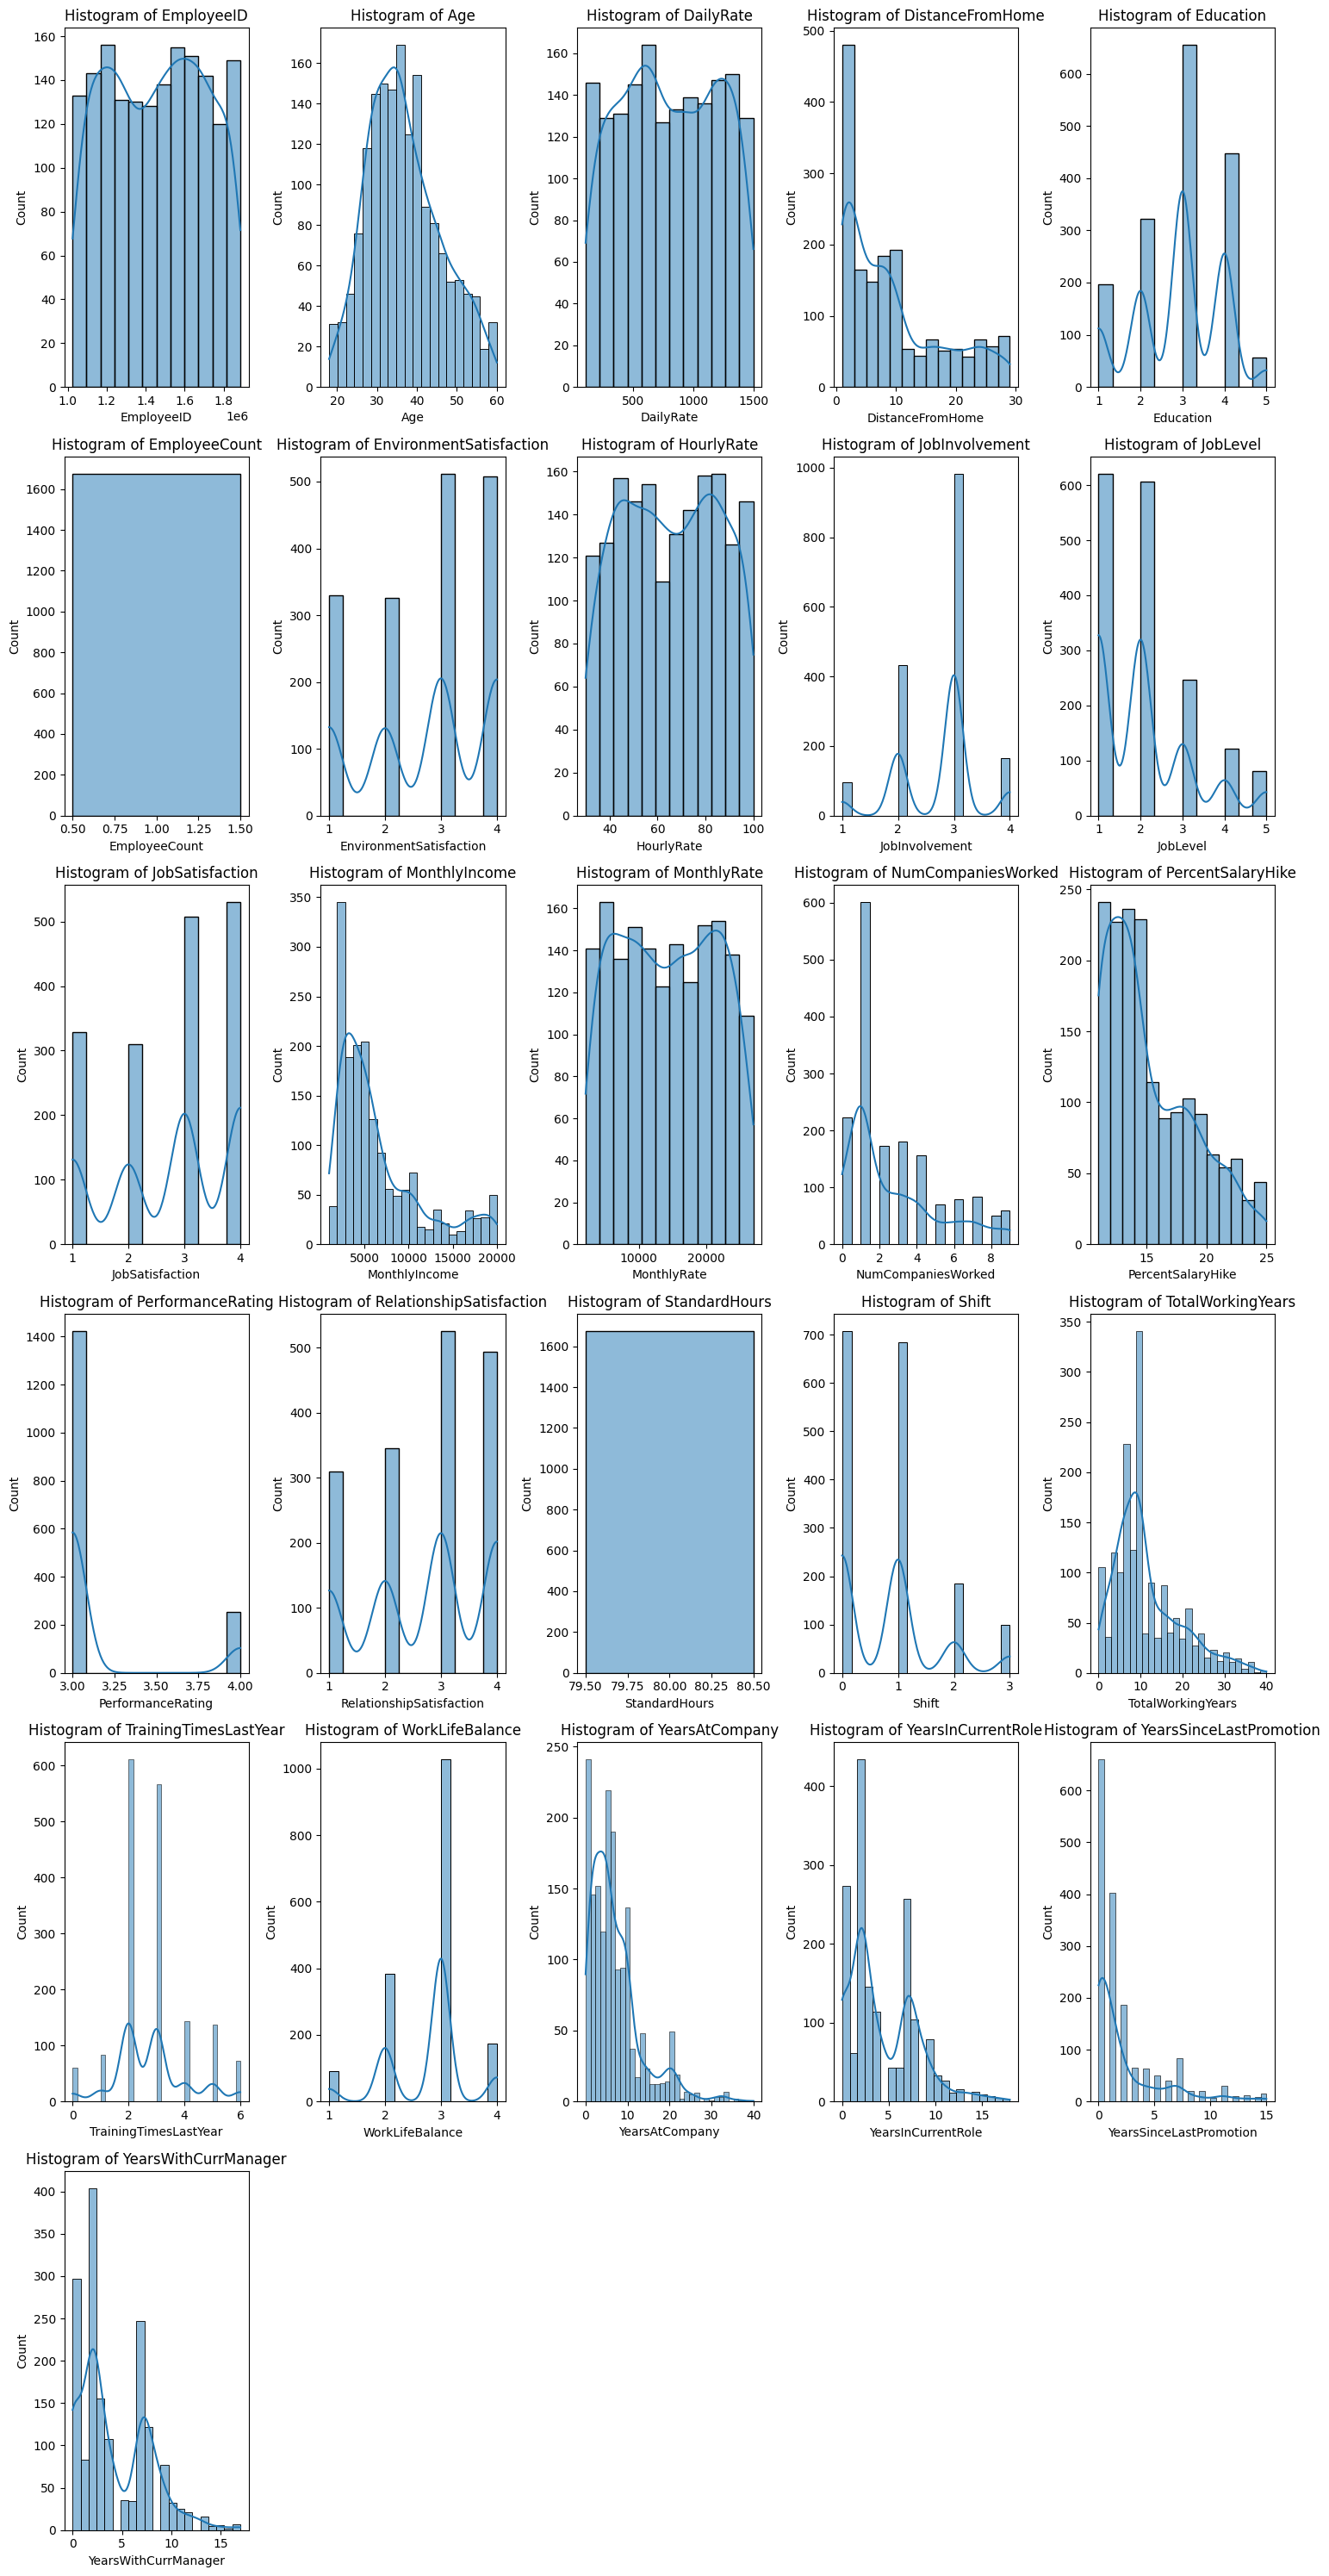

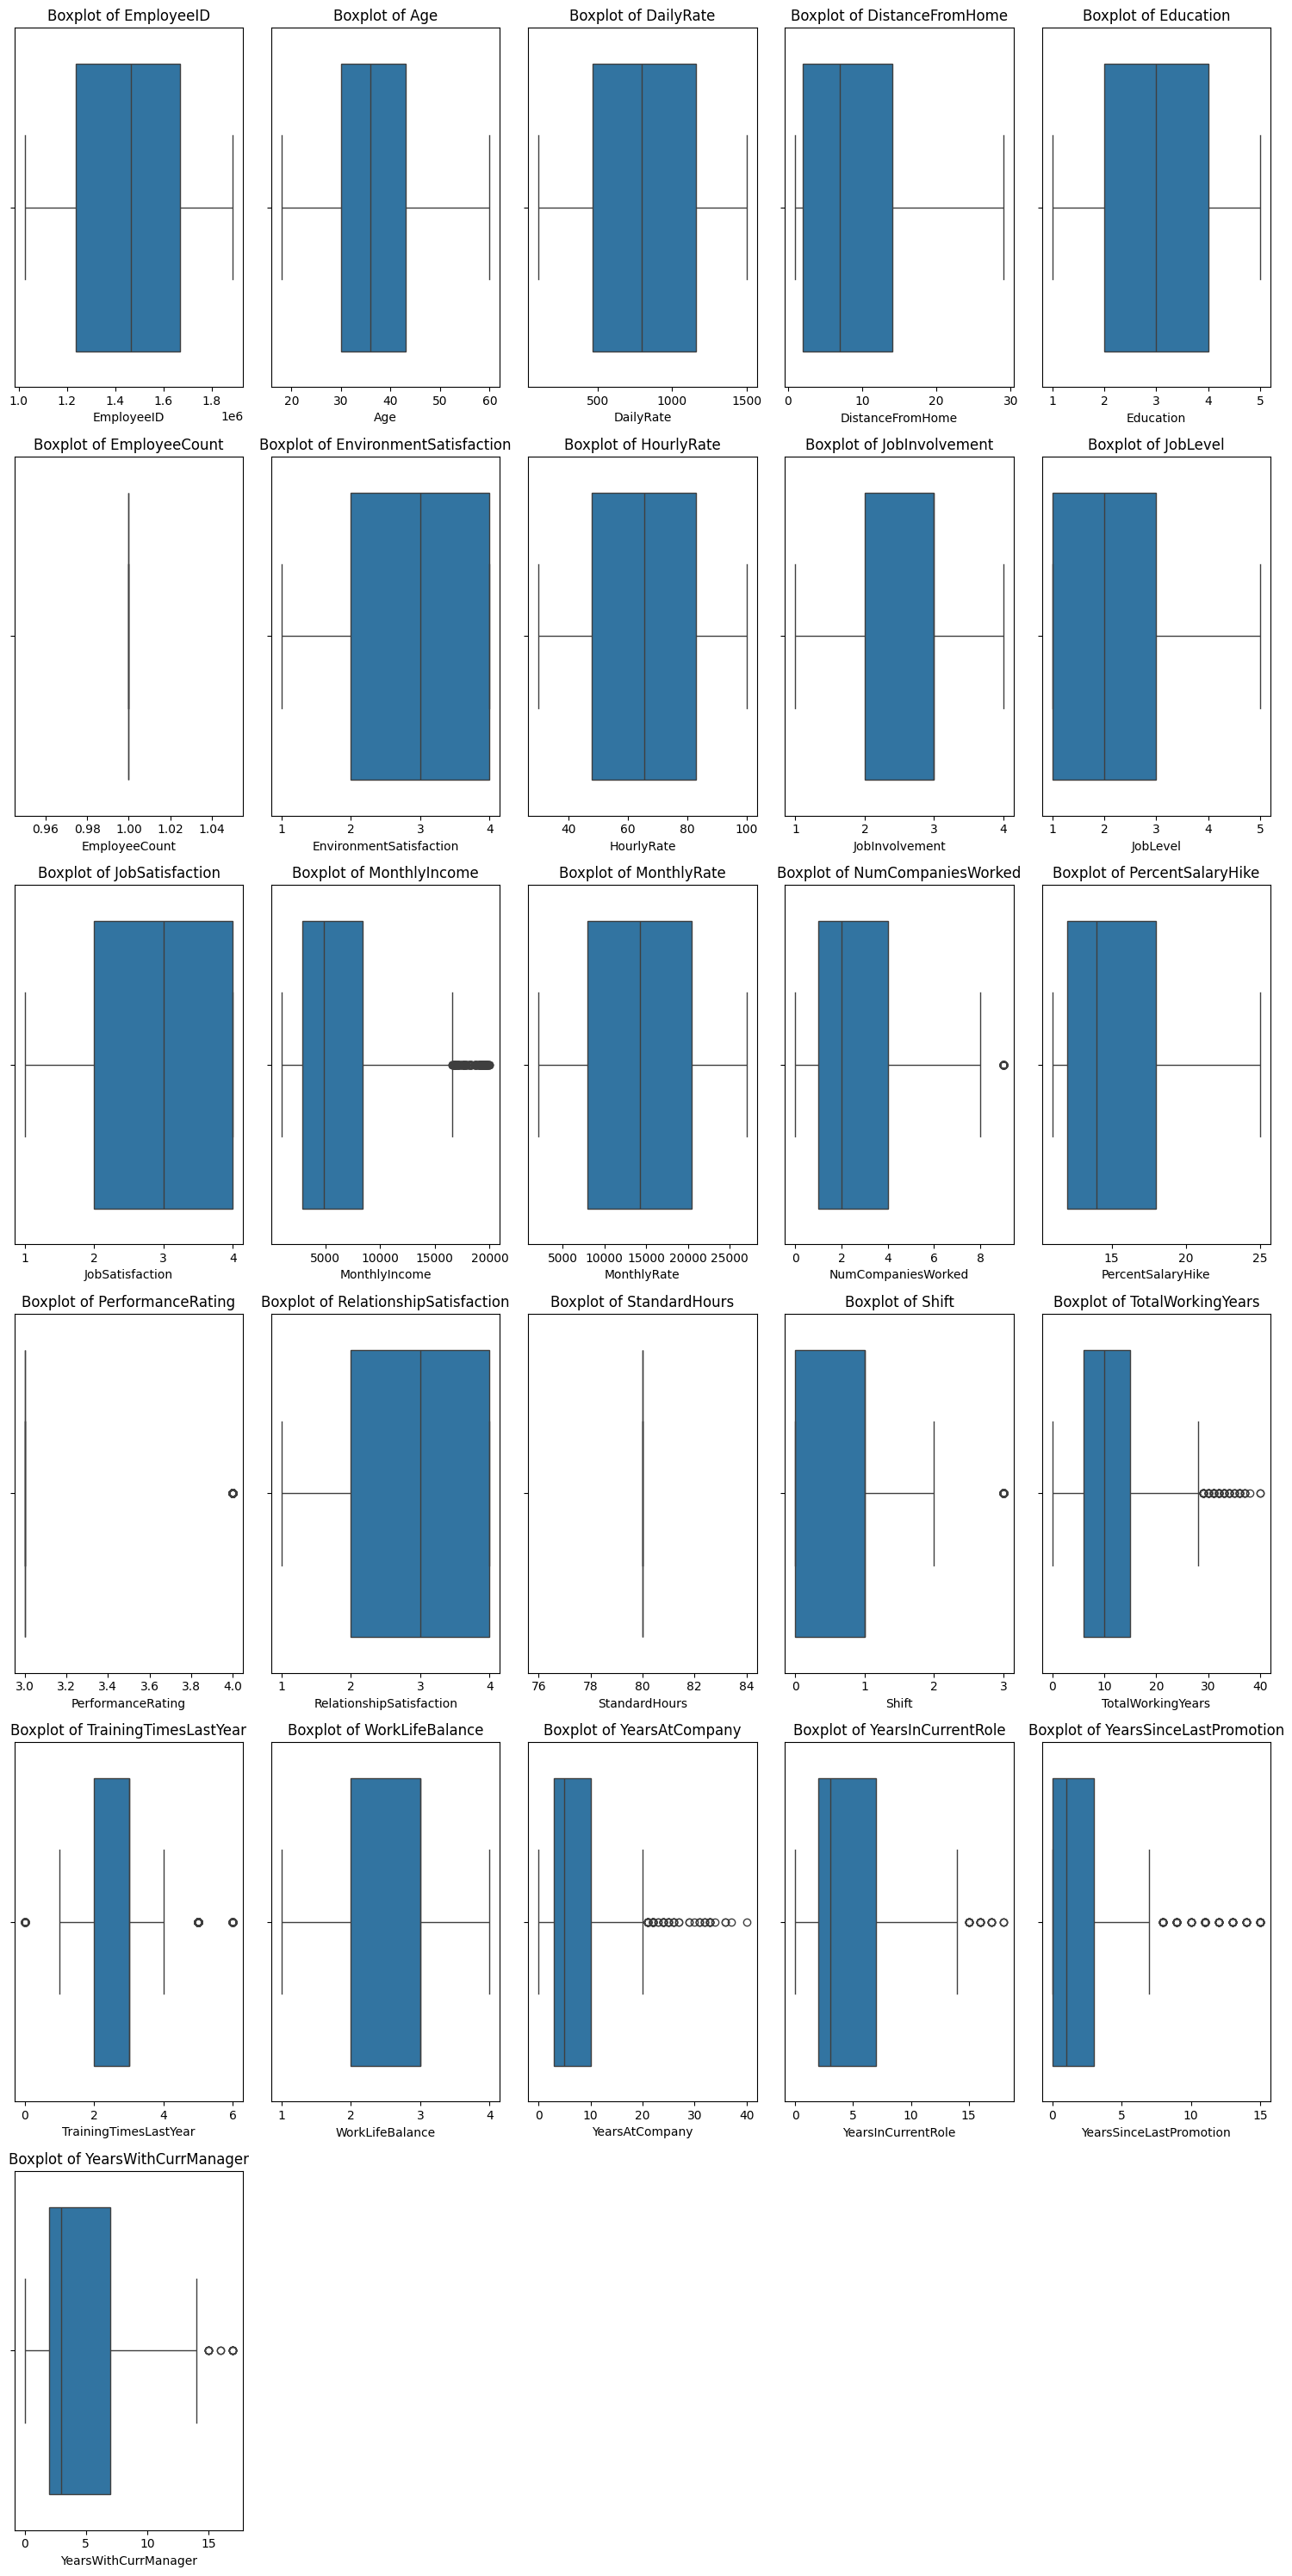

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
numerical_columns = healthcare_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the number of rows and columns needed for subplots
n_columns = 5  # You can change this to a preferred number of columns
n_rows = (len(numerical_columns) // n_columns) + (1 if len(numerical_columns) % n_columns != 0 else 0)

# Plot histograms
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.histplot(healthcare_data[column], kde=True)
    plt.title(f"Histogram of {column}")
plt.tight_layout()
plt.show()

# Boxplots for numerical features to check for outliers
plt.figure(figsize=(15, 5 * n_rows))
for i, column in enumerate(numerical_columns):
    plt.subplot(n_rows, n_columns, i + 1)
    sns.boxplot(x=healthcare_data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()


Bbased on the Boxplot the most of atribut are normaly distributed. we have also some histogram which shows that some of our data are left skewed, so we need to reduce the skewness of the variables.

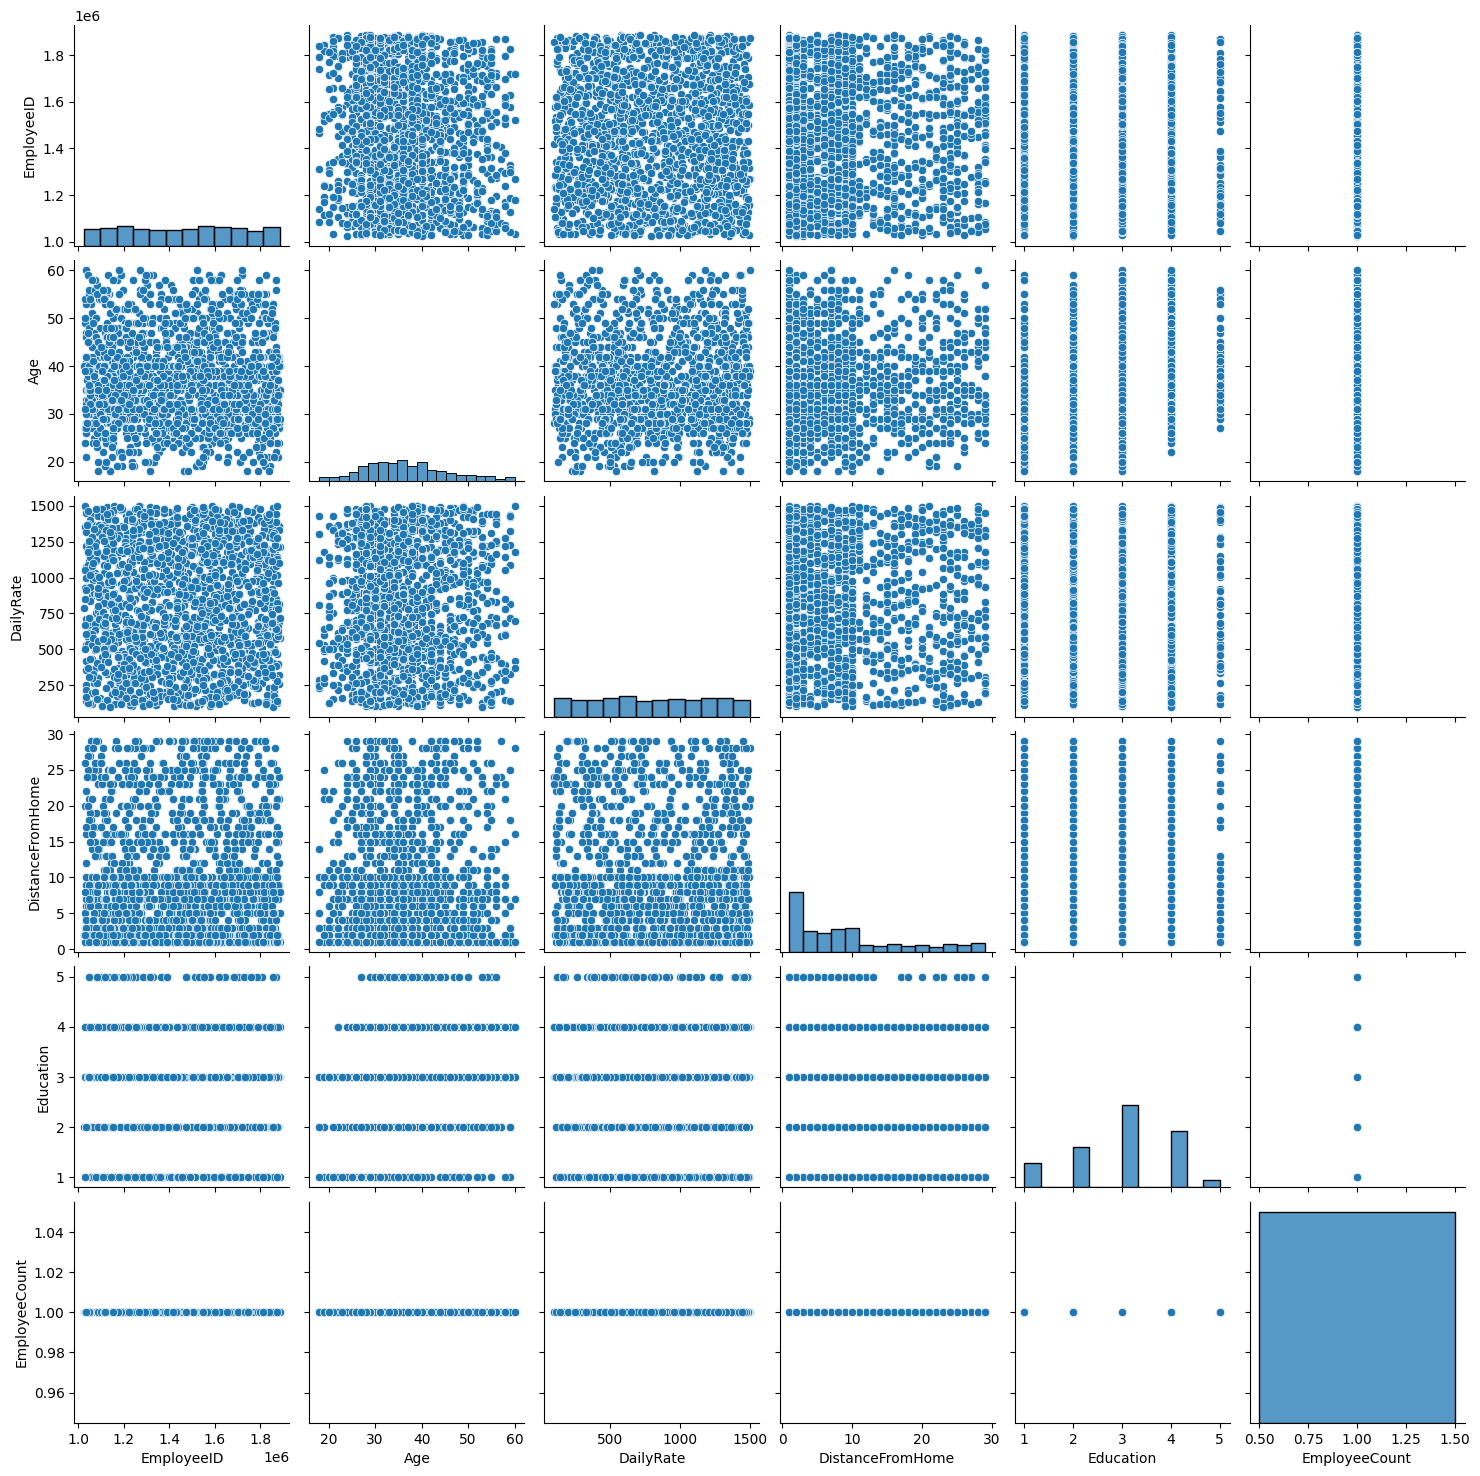

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of numerical columns for pairplot (optional)
# You can change the number of features you want to visualize
subset_numerical_columns = numerical_columns[:6]  # Select first 6 numerical features or change the number

# Plot pair plot to visualize relationships between numerical features
sns.pairplot(healthcare_data[subset_numerical_columns])
plt.show()


#### Check for skewness in the numerical data (which may require scaling).

In [20]:
# Calculate skewness for each numerical column
skewness = healthcare_data[numerical_columns].skew()

# Display skewness values
print("Skewness of numerical columns:")
print(skewness)

# Filter out features with skewness greater than 1 (or less than -1, highly skewed)
skewed_features = skewness[abs(skewness) > 1]
print("\nHighly skewed features:")
print(skewed_features)


Skewness of numerical columns:
EmployeeID                 -0.008995
Age                         0.419614
DailyRate                   0.003889
DistanceFromHome            0.953314
Education                  -0.279411
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.313217
HourlyRate                 -0.008805
JobInvolvement             -0.487887
JobLevel                    1.026815
JobSatisfaction            -0.347154
MonthlyIncome               1.367800
MonthlyRate                 0.014844
NumCompaniesWorked          1.054108
PercentSalaryHike           0.818768
PerformanceRating           1.958219
RelationshipSatisfaction   -0.309785
StandardHours               0.000000
Shift                       0.949235
TotalWorkingYears           1.098286
TrainingTimesLastYear       0.535139
WorkLifeBalance            -0.570576
YearsAtCompany              1.722257
YearsInCurrentRole          0.904216
YearsSinceLastPromotion     1.970435
YearsWithCurrManager        0.806627
dtype: 

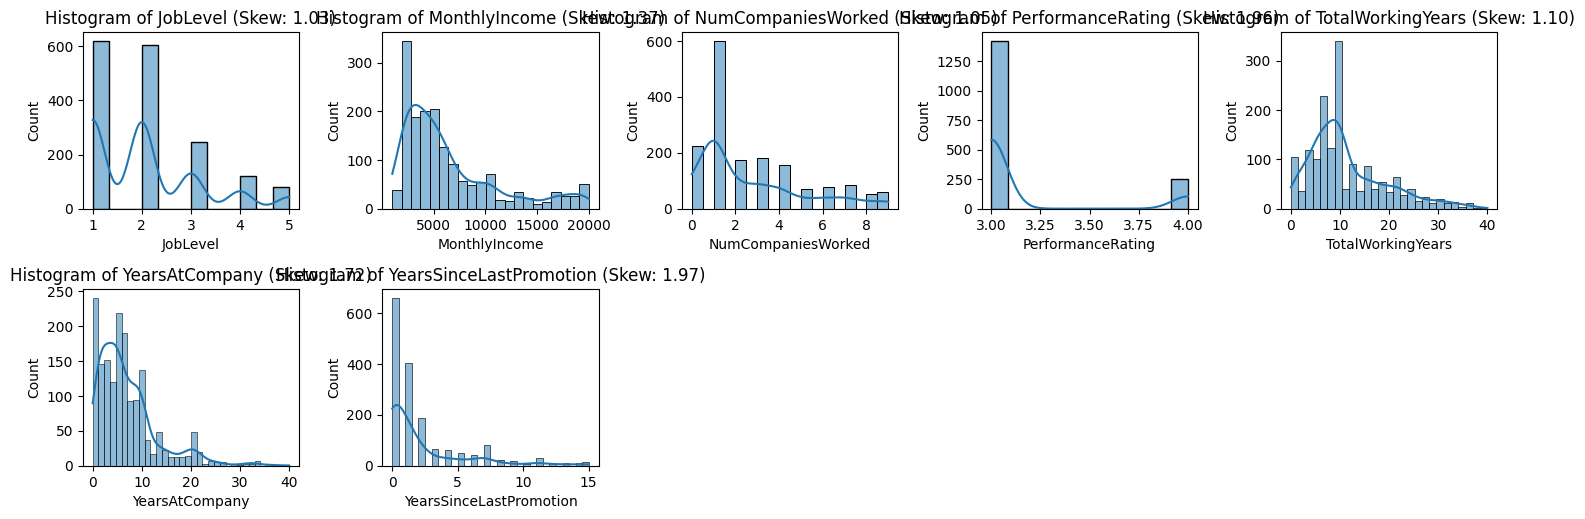

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for highly skewed features
plt.figure(figsize=(15, 10))
for i, column in enumerate(skewed_features.index):
    plt.subplot(4, 5, i + 1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(healthcare_data[column], kde=True)
    plt.title(f"Histogram of {column} (Skew: {skewness[column]:.2f})")
plt.tight_layout()
plt.show()


In [22]:
import numpy as np

# Apply log transformation to skewed columns
for column in skewed_features.index:
    healthcare_data[column] = healthcare_data[column].apply(lambda x: np.log1p(x) if x > 0 else x)

# Check skewness again after transformation
skewness_after_transformation = healthcare_data[numerical_columns].skew()
print("\nSkewness after transformation:")
print(skewness_after_transformation)



Skewness after transformation:
EmployeeID                 -0.008995
Age                         0.419614
DailyRate                   0.003889
DistanceFromHome            0.953314
Education                  -0.279411
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.313217
HourlyRate                 -0.008805
JobInvolvement             -0.487887
JobLevel                    0.453101
JobSatisfaction            -0.347154
MonthlyIncome               0.285207
MonthlyRate                 0.014844
NumCompaniesWorked          0.108442
PercentSalaryHike           0.818768
PerformanceRating           1.958219
RelationshipSatisfaction   -0.309785
StandardHours               0.000000
Shift                       0.949235
TotalWorkingYears          -0.604441
TrainingTimesLastYear       0.535139
WorkLifeBalance            -0.570576
YearsAtCompany             -0.200229
YearsInCurrentRole          0.904216
YearsSinceLastPromotion     0.710977
YearsWithCurrManager        0.806627
dtype:

#### Bar plot for categorical variables



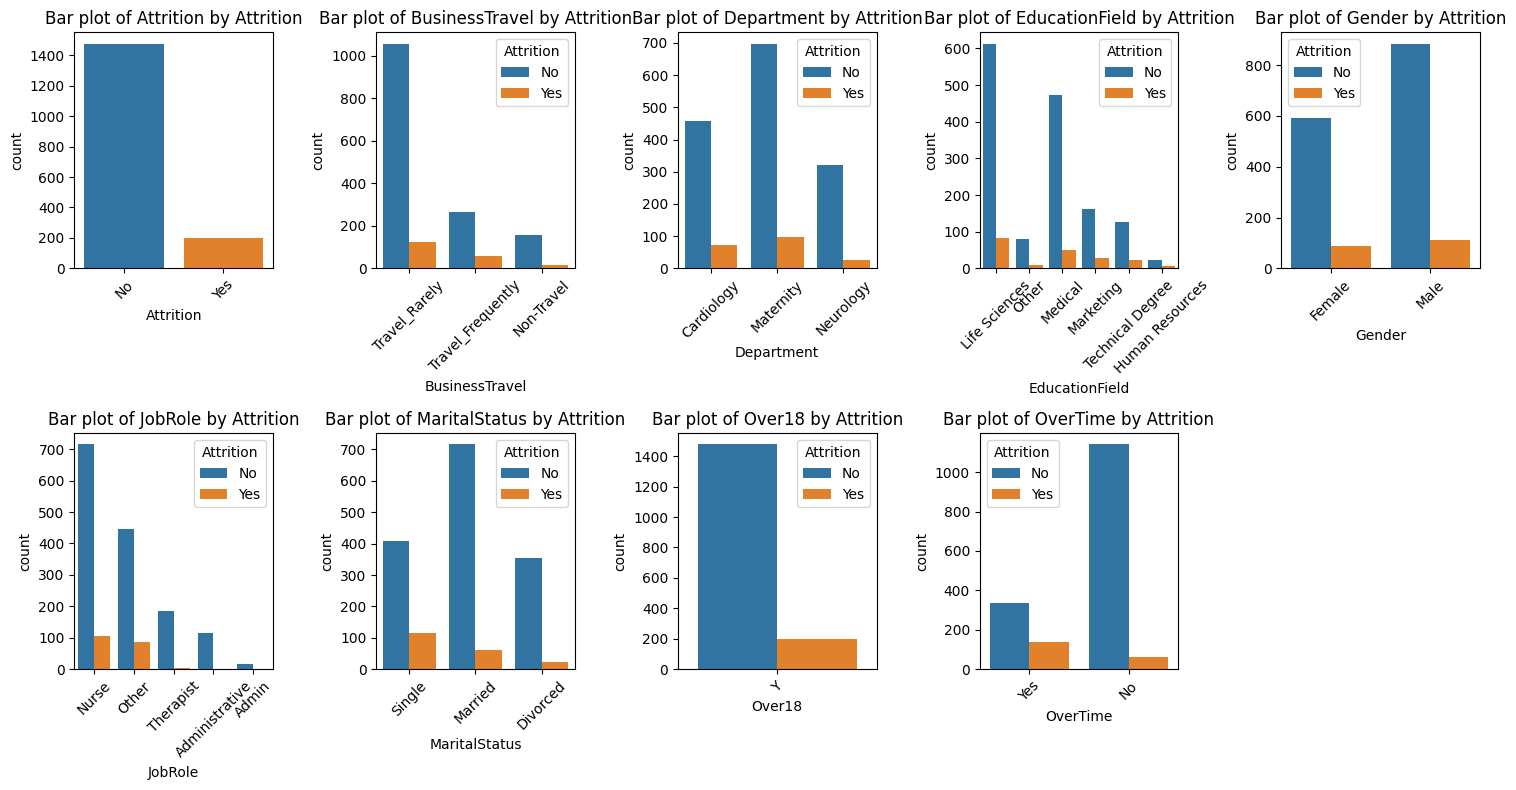

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of categorical features by 'Attrition'
categorical_columns = healthcare_data.select_dtypes(include='object').columns

# Adjust the number of rows and columns for the subplot grid
num_columns = len(categorical_columns)
num_rows = (num_columns // 5) + (1 if num_columns % 5 != 0 else 0)  # Adjust rows based on the number of features

plt.figure(figsize=(15, num_rows * 4))  # Adjust the figure size based on the number of rows

# Create a bar plot for each categorical column, segmented by 'Attrition'
for i, column in enumerate(categorical_columns):
    plt.subplot(num_rows, 5, i + 1)  # Adjust for 5 columns per row
    sns.countplot(x=healthcare_data[column], hue=healthcare_data['Attrition'])
    plt.title(f"Bar plot of {column} by Attrition")
    plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.tight_layout()
plt.show()


Based on these bar plot of categorical variables it shows that mot of the employee are who are likely to leave the job are Female because they have more frequency in the in those attristion which is yes. means they are likely to leave the company compared to male.

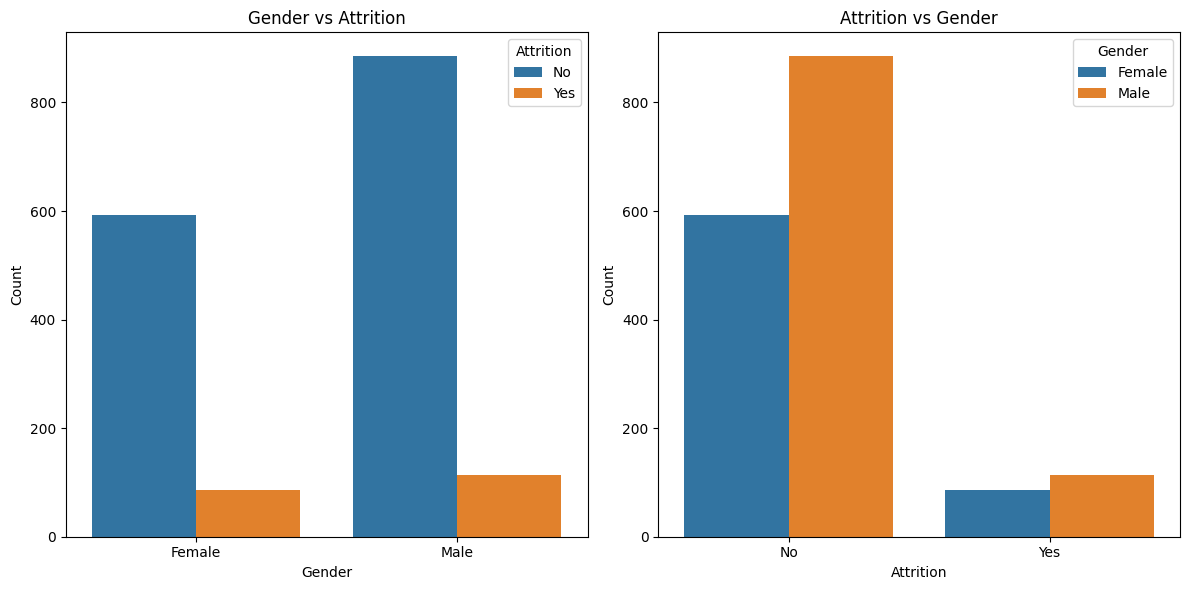

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of 'Gender' and 'Attrition' columns
# Adjust for your specific column names if they differ
plt.figure(figsize=(12, 6))

# Gender vs Attrition
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Attrition', data=healthcare_data)
plt.title('Gender vs Attrition')
plt.xlabel('Gender')
plt.ylabel('Count')

# Attrition vs Gender (optional, to flip the axes for better readability)
plt.subplot(1, 2, 2)
sns.countplot(x='Attrition', hue='Gender', data=healthcare_data)
plt.title('Attrition vs Gender')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Pie chart for Categorical variables

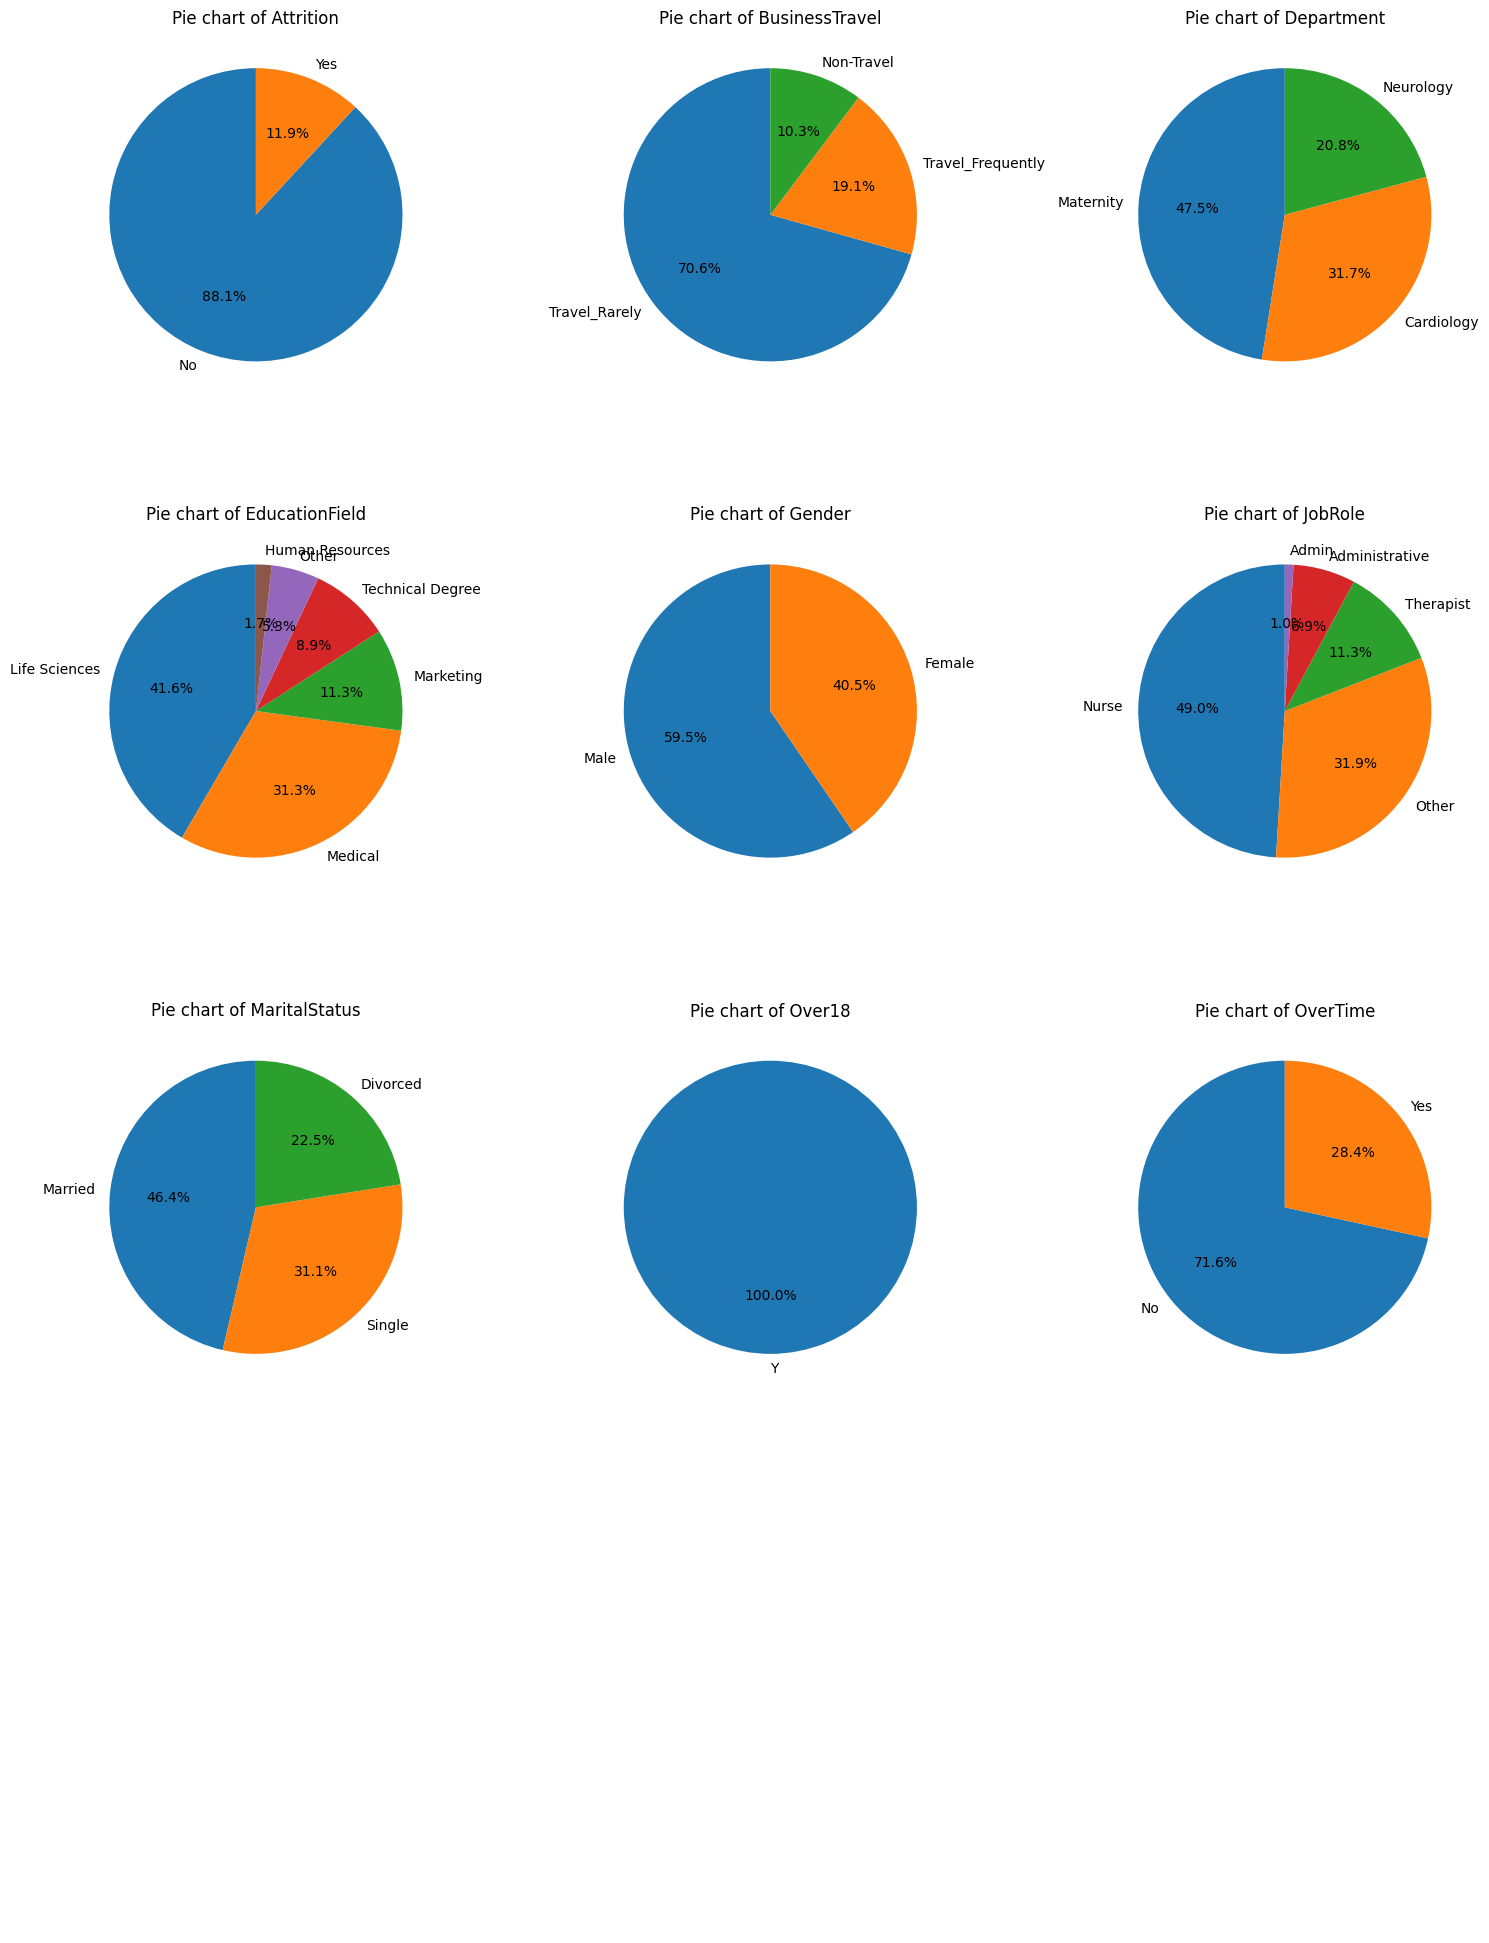

In [25]:
# # Visualize the distribution of categorical features using pie charts
# for column in categorical_columns:
#     plt.figure(figsize=(7, 7))
#     healthcare_data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
#     plt.title(f"Pie chart of {column}")
#     plt.ylabel('')  # Remove the 'ylabel' for a cleaner look
#     plt.show()

import matplotlib.pyplot as plt

# Create a grid of subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(categorical_columns) // n_cols) + 1  # Number of rows based on the number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each categorical column and plot a pie chart on each axis
for i, column in enumerate(categorical_columns):
    axes[i].pie(healthcare_data[column].value_counts(), 
                labels=healthcare_data[column].value_counts().index, 
                autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Pie chart of {column}")
    axes[i].set_ylabel('')  # Remove the 'ylabel' for a cleaner look

# Hide any unused subplots if the number of categorical columns is not a multiple of n_cols
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.tight_layout()
plt.show()



### 5. Preprocessing and Encoding Categorical Columns

We will encode nominal variables depending on the nature of the categorical data (nominal or ordinal).

In [26]:
# Check unique values of categorical columns to determine if they are nominal or ordinal

categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

for column in categorical_columns:
    print(f"{column} unique values: {healthcare_data[column].unique()}")


Attrition unique values: ['No' 'Yes']
BusinessTravel unique values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department unique values: ['Cardiology' 'Maternity' 'Neurology']
EducationField unique values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender unique values: ['Female' 'Male']
JobRole unique values: ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
MaritalStatus unique values: ['Single' 'Married' 'Divorced']
Over18 unique values: ['Y']
OverTime unique values: ['Yes' 'No']


For JobRole, Department, BusinessTravel, : The categories have no meaningful order or ranking, so it's nominal.
for Gender: The categories are simply gender categories, so it's nominal.

For OverTime:represents a yes/no type of data, so it's nominal.

Education: [2, 1, 4, 3, 5] These  value represent different levels of education, which have a clear order. So, it's ordinal.

so : Nominal Variables (like JobRole, Department, Gender, BusinessTravel, OverTime) should be one-hot encoded and Ordinal Variables (like Education) should be label encoded or manually mapped.

### One-Hot Encoding for Nominal Variables

In [27]:
import pandas as pd
import category_encoders as ce  # For Binary Encoding

# Define categorical columns for different encoding strategies
binary_columns = [ 'Over18', 'Gender', 'OverTime']
onehot_columns = ['JobRole', 'Department', 'BusinessTravel', 'MaritalStatus', 'EducationField']

# Apply Binary Encoding
binary_encoder = ce.BinaryEncoder(cols=binary_columns, drop_invariant=True)
healthcare_data_binary = binary_encoder.fit_transform(healthcare_data[binary_columns])

# Apply One-Hot Encoding
healthcare_data_onehot = pd.get_dummies(healthcare_data[onehot_columns], drop_first=True)
# Convert the boolean values to 0 and 1
healthcare_data_onehot = healthcare_data_onehot.astype(int)

# Drop original categorical columns and concatenate the encoded ones
healthcare_data_encoded = healthcare_data.drop(columns=binary_columns + onehot_columns)
healthcare_data_encoded = pd.concat([healthcare_data_encoded, healthcare_data_binary, healthcare_data_onehot], axis=1)
#
# Display the encoded dataframe
healthcare_data_encoded.head()





,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,Department_Neurology,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,MaritalStatus_Married,MaritalStatus_Single,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1313919,41,No,1102,1,2,1,2,94,3,...,0,0,1,0,1,1,0,0,0,0
1,1200302,49,No,279,8,1,1,3,61,2,...,0,1,0,1,0,1,0,0,0,0
2,1060315,37,Yes,1373,2,2,1,4,92,2,...,0,0,1,0,1,0,0,0,1,0
3,1272912,33,No,1392,3,4,1,4,56,3,...,0,1,0,1,0,1,0,0,0,0
4,1414939,27,No,591,2,1,1,1,40,3,...,0,0,1,1,0,0,0,1,0,0


In [28]:
healthcare_data_encoded.columns

Index(['EmployeeID', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Gender_0',
       'Gender_1', 'OverTime_0', 'OverTime_1', 'JobRole_Administrative',
       'JobRole_Nurse', 'JobRole_Other', 'JobRole_Therapist',
       'Department_Maternity', 'Department_Neurology',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Ot

We have two separate datasets, so instead of splitting one dataset, we want to split the two existing datasets. since we have a folder containing the two datasets: watson_healthcare_modified.csv and watson_shap_values_for_testset.csv. but we decided to don't consider  test set because it does't have target value.

Here are The first row of our training set and testing set

In [29]:
x = healthcare_data_encoded.drop(columns=['Attrition'])
y = healthcare_data_encoded[['Attrition']]
y.head()

,Attrition
0,No
1,No
2,Yes
3,No
4,No


In [30]:
from sklearn.preprocessing import LabelEncoder

# Extract the target column
y = healthcare_data_encoded['Attrition']

# Encode categorical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert back to DataFrame (optional)
y = pd.DataFrame(y_encoded, columns=['Attrition_Encoded'])

# Display first few rows
print(y.head())


   Attrition_Encoded
0                  0
1                  0
2                  1
3                  0
4                  0


# Logistic regression

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# For Logistic Regression, we scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

print(f"Logistic Regression accuracy: {log_reg.score(X_test_scaled, y_test)}")
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1 Score: {f1_log_reg:.4f}")


Logistic Regression accuracy: 0.9285714285714286
Logistic Regression Evaluation:
Accuracy: 0.9286
Precision: 0.8485
Recall: 0.5957
F1 Score: 0.7000


/home/student/Desktop/Wonderful/New Test/Healtcare_employee/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Random Forest

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest accuracy: {random_forest.score(X_test, y_test)}")
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


Random Forest accuracy: 0.8928571428571429
Random Forest Evaluation:
Accuracy: 0.8929
Precision: 0.7895
Recall: 0.3191
F1 Score: 0.4545


/home/student/Desktop/Wonderful/New Test/Healtcare_employee/venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The suitable classification algorithm is Logistic regression cbecuse if we compare it to the ompare to Landom forest there is a high difference in the values obtained by evaluation metrica using Logistic regression  compared to the value obtained by random forest's evaluation metrics.